<font size=6>
    Sberbank Russian Housing Market
</font>

<hr style="border: solid rgb(255,0,0) 0.0px; background-color: rgb(255,0,0);height: 2.0px;"/>
<font color='red' size=5>
    Data is 
</font>
<hr style="border: solid rgb(255,0,0) 0.0px; background-color: rgb(255,0,0);height: 2.0px;"/>

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../../datasets/sberbank-russian-housing-market/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../../datasets/sberbank-russian-housing-market/sample_submission.csv
../../datasets/sberbank-russian-housing-market/macro.csv
../../datasets/sberbank-russian-housing-market/test.csv
../../datasets/sberbank-russian-housing-market/data_dictionary.txt
../../datasets/sberbank-russian-housing-market/train.csv
../../datasets/sberbank-russian-housing-market/sberbank-russian-housing-market.zip
../../datasets/sberbank-russian-housing-market/__MACOSX/._test.csv
../../datasets/sberbank-russian-housing-market/__MACOSX/._train.csv


## Load the data

In [4]:
df = pd.read_csv('../../datasets/sberbank-russian-housing-market/train.csv', \
                 infer_datetime_format=True, parse_dates=['timestamp'])

In [5]:
df.shape

(30471, 292)

In [6]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Data columns (total 292 columns):
id                                       30471 non-null int64
timestamp                                30471 non-null datetime64[ns]
full_sq                                  30471 non-null int64
life_sq                                  24088 non-null float64
floor                                    30304 non-null float64
max_floor                                20899 non-null float64
material                                 20899 non-null float64
build_year                               16866 non-null float64
num_room                                 20899 non-null float64
kitch_sq                                 20899 non-null float64
state                                    16912 non-null float64
product_type                             30471 non-null object
sub_area                                 30471 non-null object
area_m                                   30471 non-null f

In [26]:
df.head(10)

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452
5,6,2011-09-06,67,46.0,14.0,NaN,NaN,NaN,NaN,NaN,...,62,14,1,53,78,1,20,113,17,9100000
6,7,2011-09-08,25,14.0,10.0,NaN,NaN,NaN,NaN,NaN,...,81,16,3,38,80,1,27,127,8,5500000
7,8,2011-09-09,44,44.0,5.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,11,18,1,0,47,4,2000000
8,9,2011-09-10,42,27.0,5.0,NaN,NaN,NaN,NaN,NaN,...,19,8,1,18,34,1,3,85,11,5300000
9,10,2011-09-13,36,21.0,9.0,NaN,NaN,NaN,NaN,NaN,...,19,13,0,10,20,1,3,67,1,2000000


### Characterize the missing values

In [8]:
missing = [(c, df[c].isna().mean()*100) for c in df]
missing = pd.DataFrame(missing, columns=["column_name", "percent_missing"])
missing = missing[missing.percent_missing > 0]
display(missing.sort_values("percent_missing", ascending=False))

,column_name,percent_missing
24,hospital_beds_raion,47.392603
7,build_year,44.649011
10,state,44.498047
161,cafe_sum_500_max_price_avg,43.585704
160,cafe_sum_500_min_price_avg,43.585704
162,cafe_avg_price_500,43.585704
5,max_floor,31.413475
6,material,31.413475
8,num_room,31.413475
9,kitch_sq,31.413475


In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import random
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, 20)]
random.shuffle(colors)

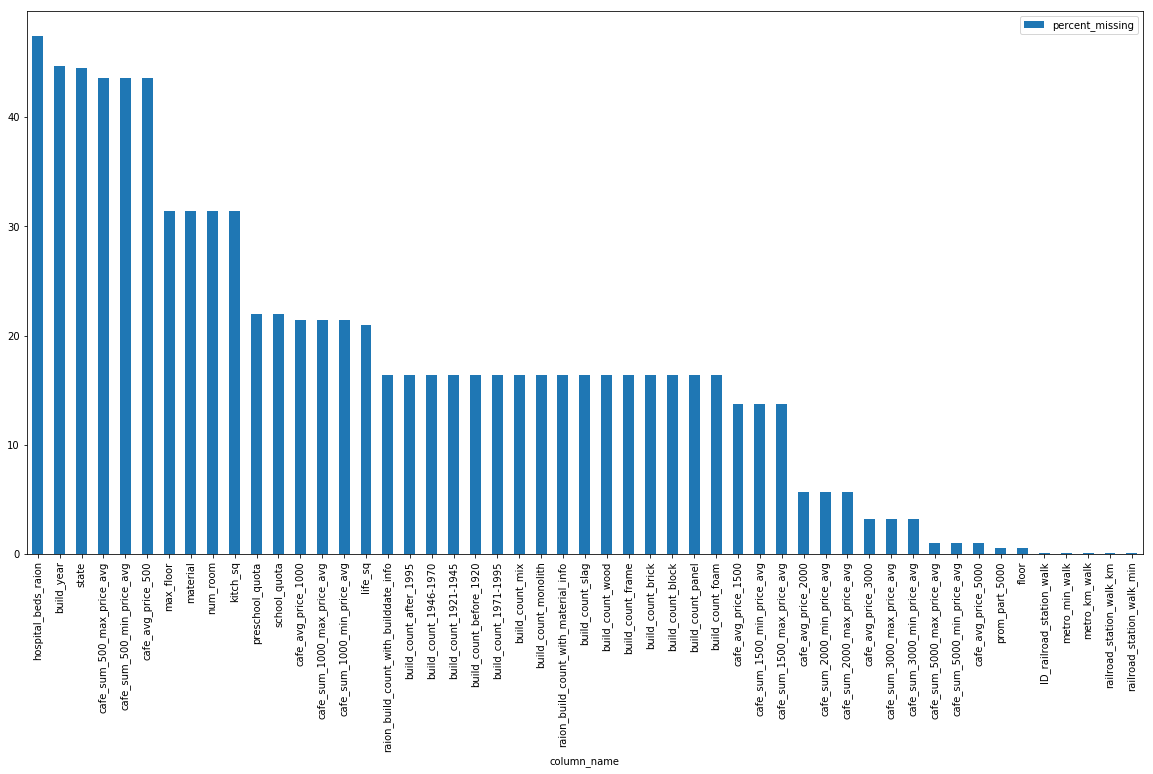

In [10]:
fig, ax = plt.subplots(1,1,figsize=[20,10])
missing.sort_values("percent_missing", ascending=False).plot.bar(x='column_name',y='percent_missing', ax=ax)

In [11]:
df.shape, missing.shape

((30471, 292), (51, 2))

In [12]:
missing_col_names = missing.column_name.values.tolist() + ['price_doc']
all_cols = df.columns.tolist()

In [13]:
all_full_cols = [item for item in all_cols if item not in missing_col_names]

In [14]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

X = df.filter(all_full_cols, axis=1).select_dtypes(include=numerics)

In [86]:
X.shape

(30471, 224)

<hr style="border: 4px dotted #aaaaaa; border-style: none none dotted; color: #fff; background-color: #fff;"/>

## With PCA

(1, 10000000000.0)

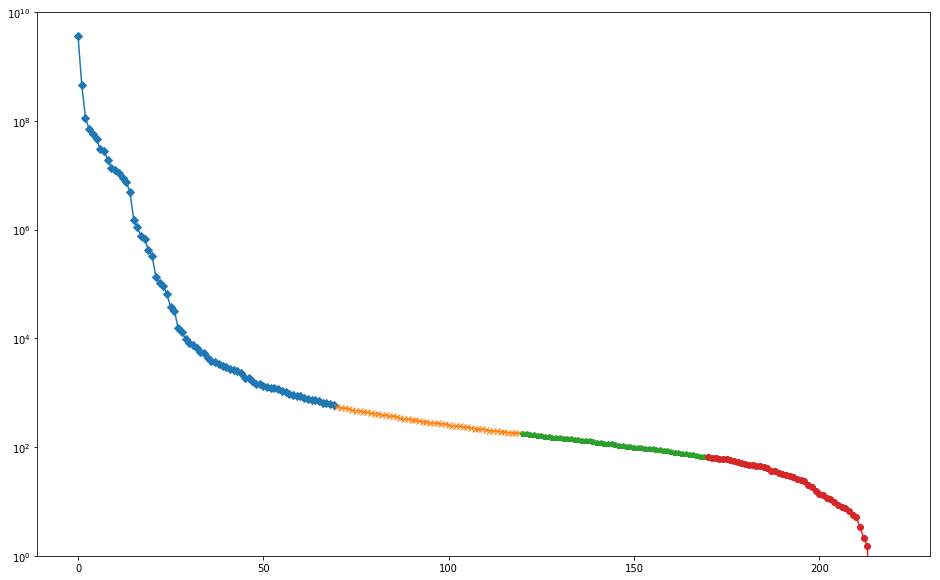

In [91]:
from sklearn.decomposition import PCA

fig, ax = plt.subplots(1,1,figsize=(16,10))
markers = ['D', 'x','p', 'o']
start=0
for n,compo in enumerate([70,120,170,220]):
    # we carefully reduce dimensionality from 271 features to 250 dimensions
    pca = PCA(n_components=compo)

    X_pca = pca.fit_transform(X)
    
    stop=compo
    sing_vals = pca.singular_values_[start:stop]
    ax.plot(np.arange(start,stop,1),sing_vals, marker=markers[n])
    start=compo
plt.yscale('log')
plt.ylim(1,1e10);

**note** the data is too sparse and the differences are too large to make sense out of matrix plots - need to rescale?

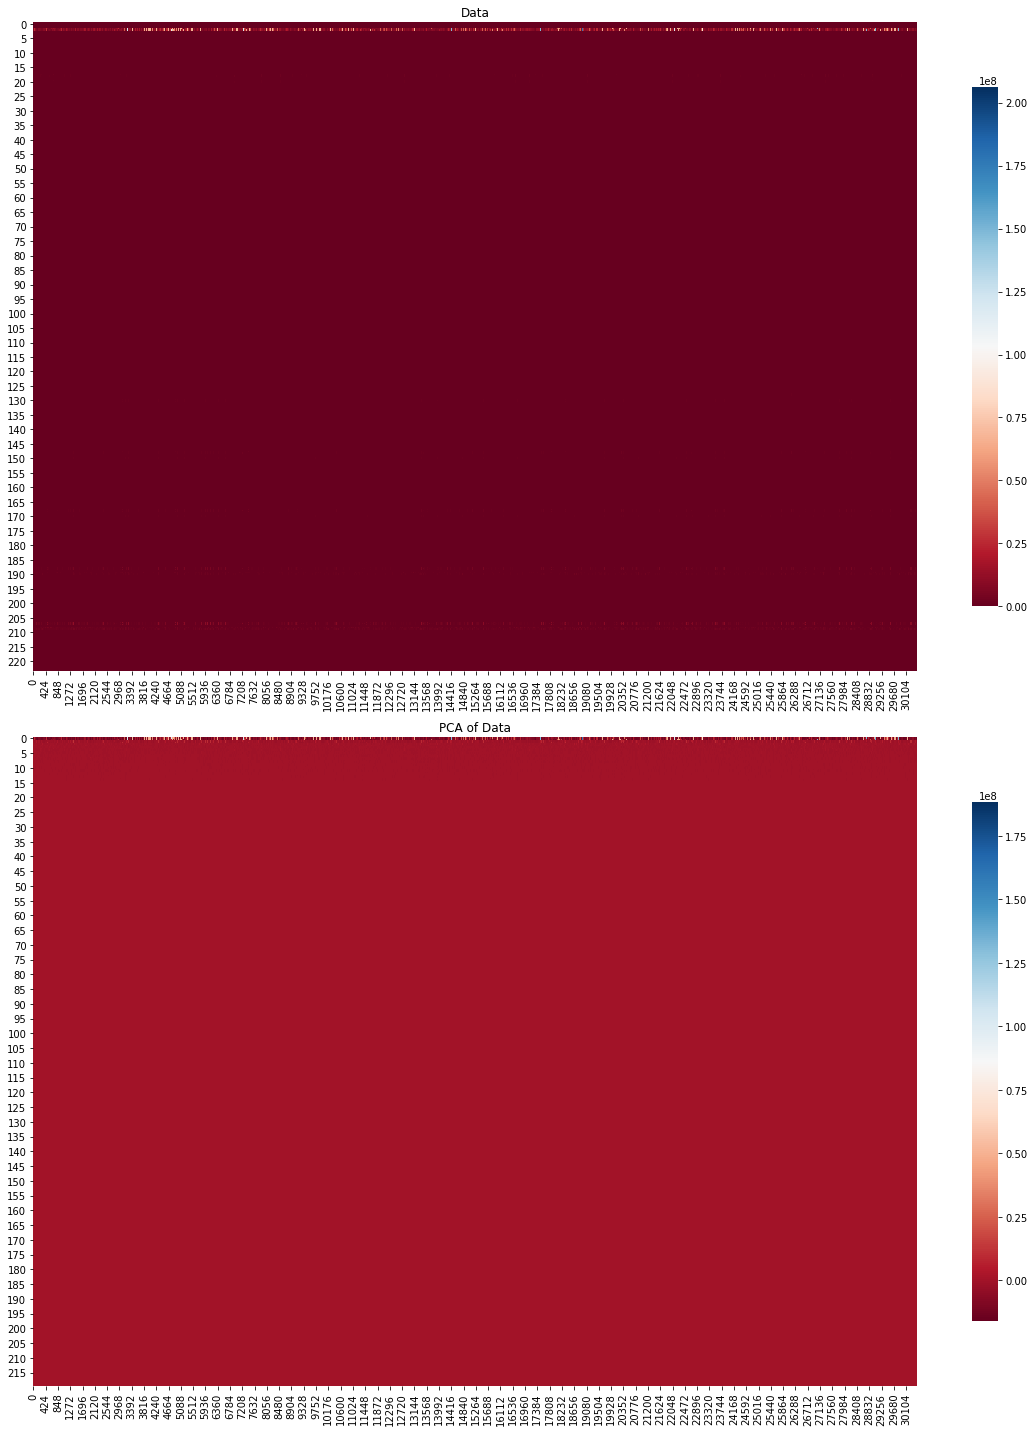

In [94]:
fig, ax = plt.subplots(2,1,figsize=(16,20))
sns.heatmap(X.values.transpose(), cmap="RdBu", square=False, cbar_kws={"shrink": .8}, ax=ax[0])
ax[0].set_title("Data")

sns.heatmap(X_pca.transpose(), cmap="RdBu", square=False, cbar_kws={"shrink": .8}, ax=ax[1])
ax[1].set_title("PCA of Data")

plt.tight_layout()
plt.show()

<hr style="border: 4px dotted #aaaaaa; border-style: none none dotted; color: #fff; background-color: #fff;"/>

In [15]:
df.price_doc.describe()

count    3.047100e+04
mean     7.123035e+06
std      4.780111e+06
min      1.000000e+05
25%      4.740002e+06
50%      6.274411e+06
75%      8.300000e+06
max      1.111111e+08
Name: price_doc, dtype: float64

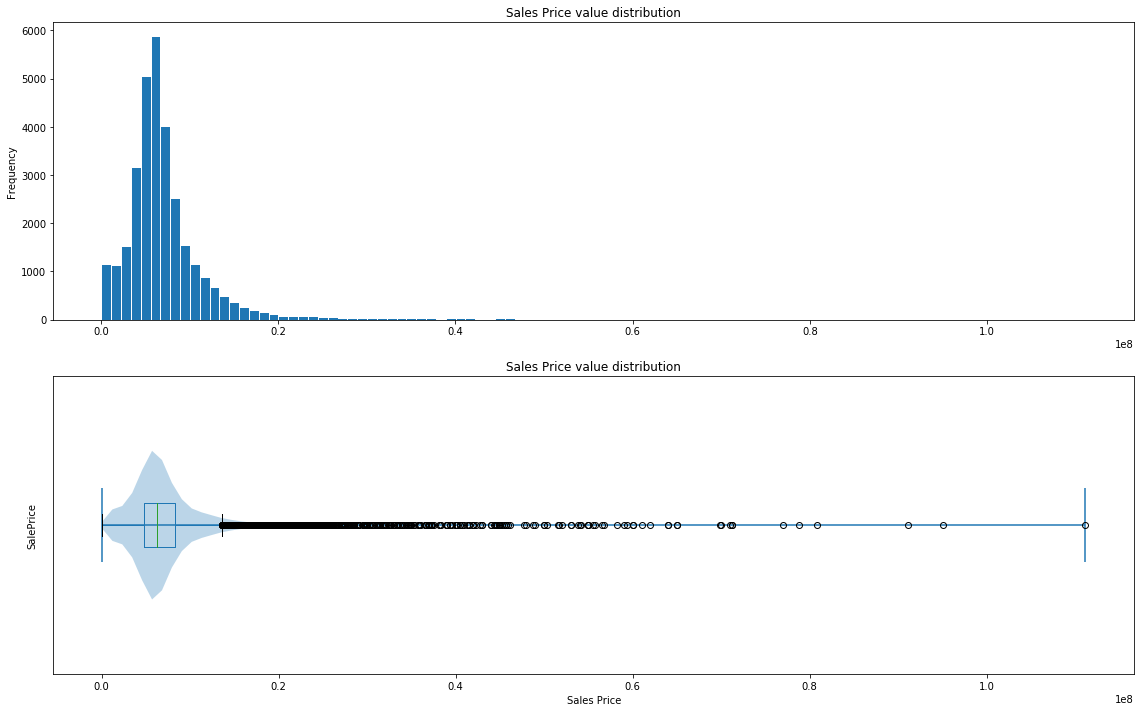

In [33]:
fig, ax = plt.subplots(2,1,figsize=(16,10))

df.price_doc.plot(kind="hist", bins=100, rwidth=0.9, ax=ax[0])
ax[0].set_title("Sales Price value distribution")
plt.xlabel("Sales Price")

ax[1].violinplot(df.sort_values('timestamp')[['price_doc']].values, vert=False)
df.price_doc.plot(kind="box", vert=False, ax=ax[1])
plt.title("Sales Price value distribution")
plt.xlabel("Sales Price")
plt.xlim(xlims)
plt.yticks([0], [''])
plt.ylabel("SalePrice\n", rotation=90)
plt.tight_layout()


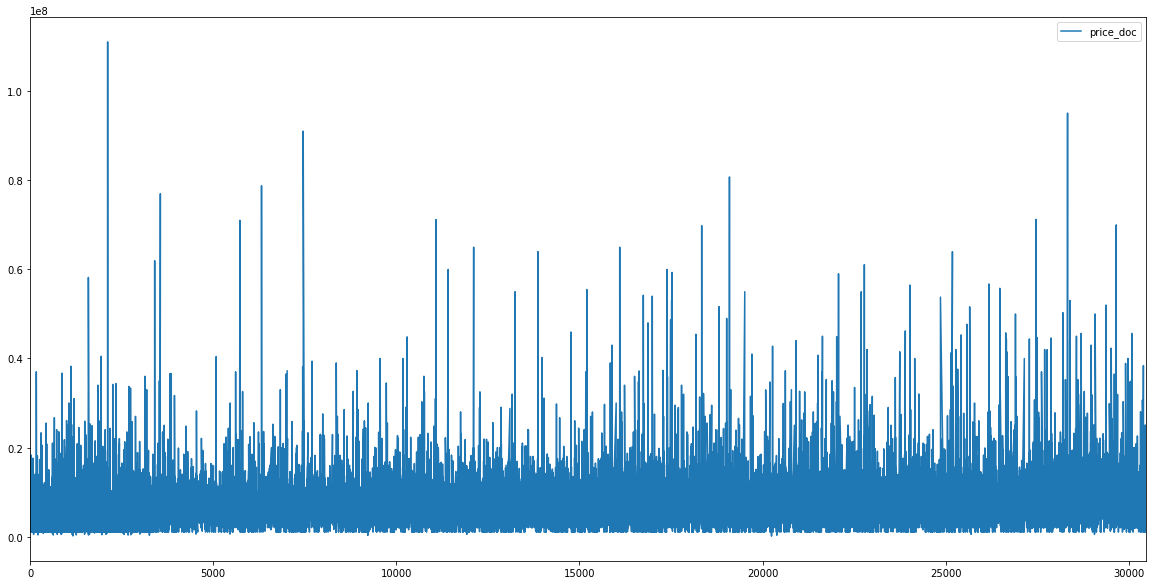

In [16]:
fig, ax = plt.subplots(1,1, figsize=[20,10])
df.sort_values('timestamp')[['price_doc']].plot(ax=ax)

### Correlations

In [19]:
# we drop Id (not relevant)
X = df.filter(all_full_cols+['price_doc'], axis=1).select_dtypes(include=numerics)
corr = X.drop(["id"], axis=1).select_dtypes(include="number").corr()

In [20]:
corr.shape

(224, 224)

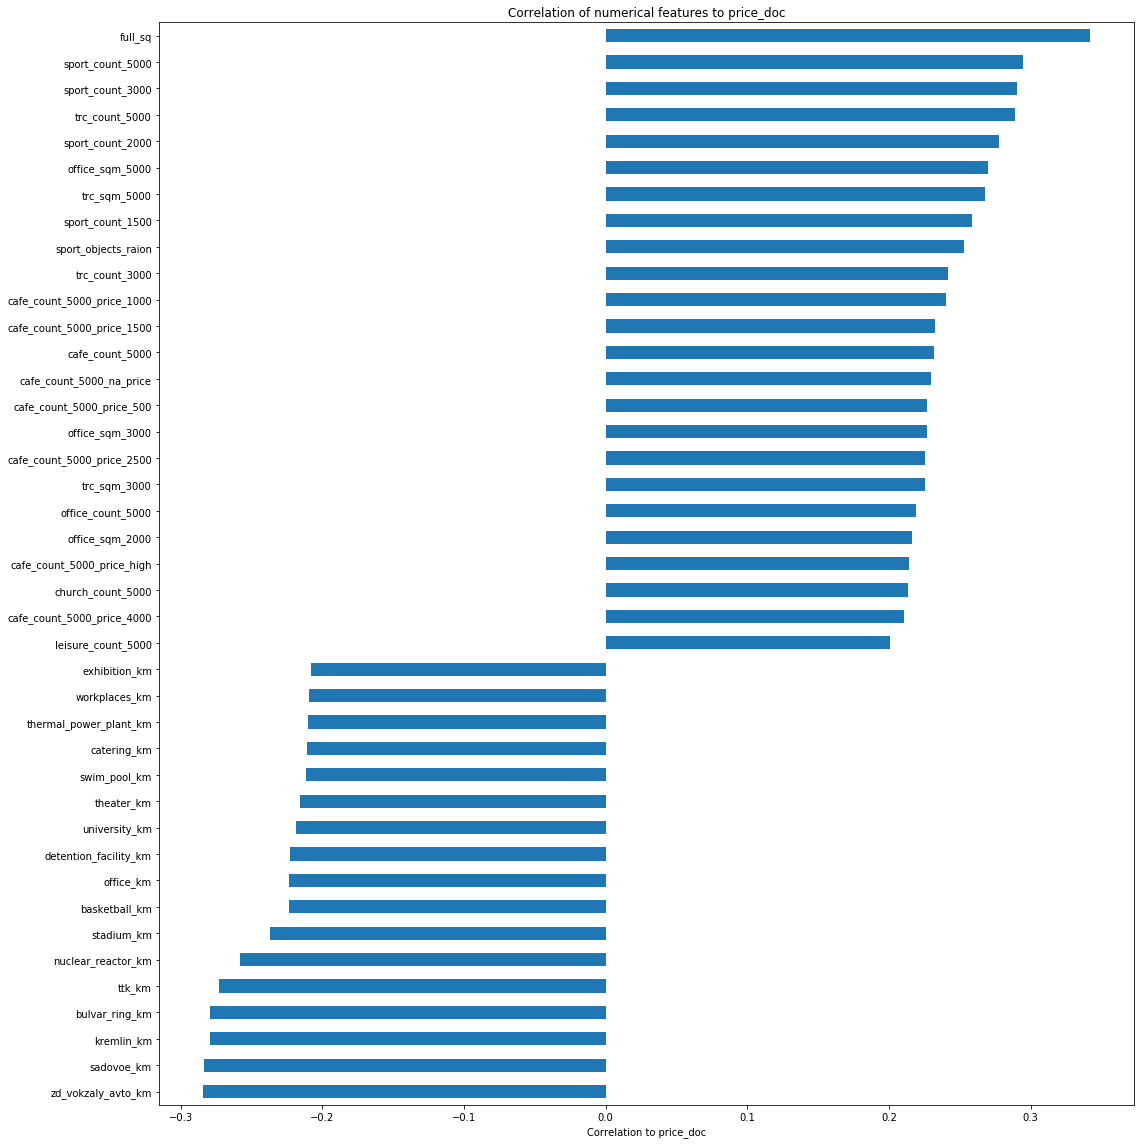

In [177]:
plt.figure(figsize=(16,16));
'''corr["price_doc"].sort_values(ascending=True)[:-1]\
                 .reset_index() \
                 .plot(y='index', kind="barh")'''
corr[abs(corr["price_doc"])>=0.2]["price_doc"].sort_values(ascending=True)[:-1]\
                 .plot(kind="barh")
plt.title("Correlation of numerical features to price_doc")
plt.xlabel("Correlation to price_doc")
plt.tight_layout()
plt.show()

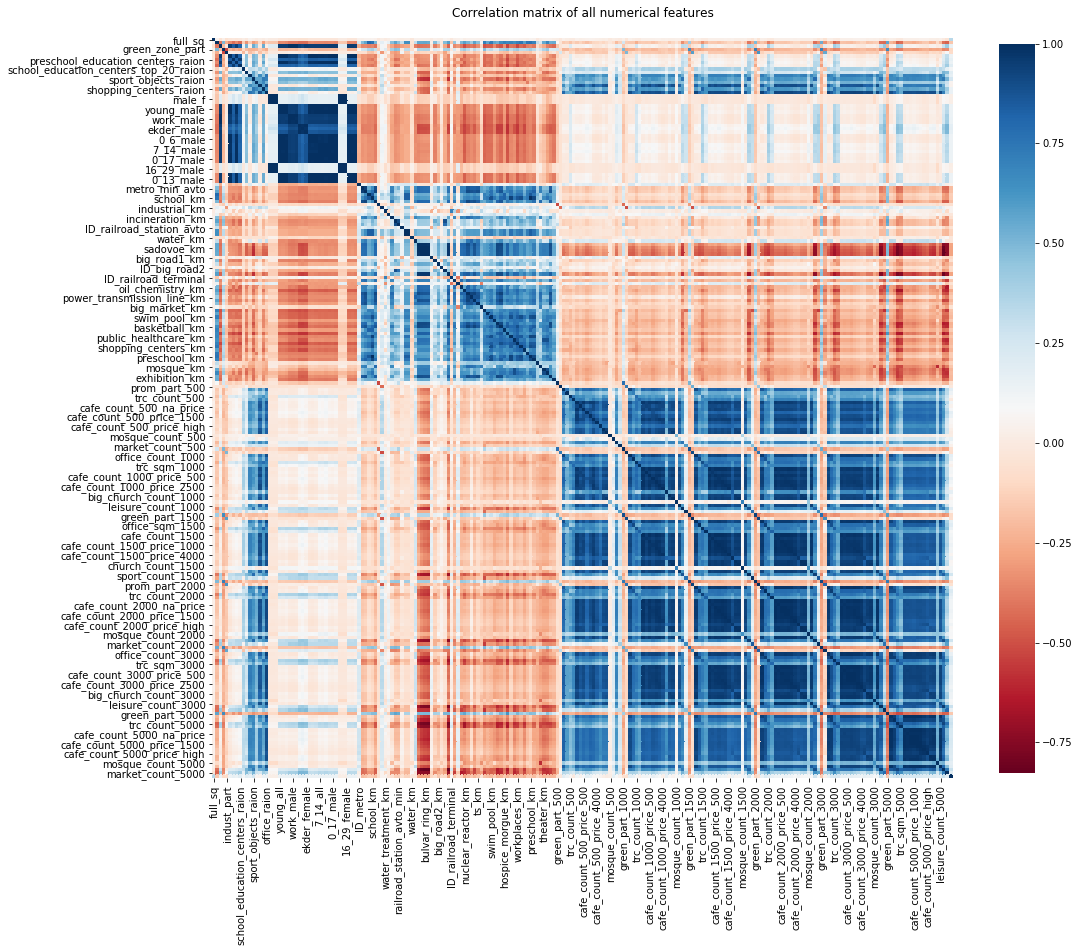

In [21]:
# sort by SalePrice to make more sense in row order
plt.subplots(figsize=(16,16));
sns.heatmap(corr, cmap="RdBu", square=True, cbar_kws={"shrink": .7})
plt.title("Correlation matrix of all numerical features\n")
plt.tight_layout()
plt.show()

### Reduce features: 

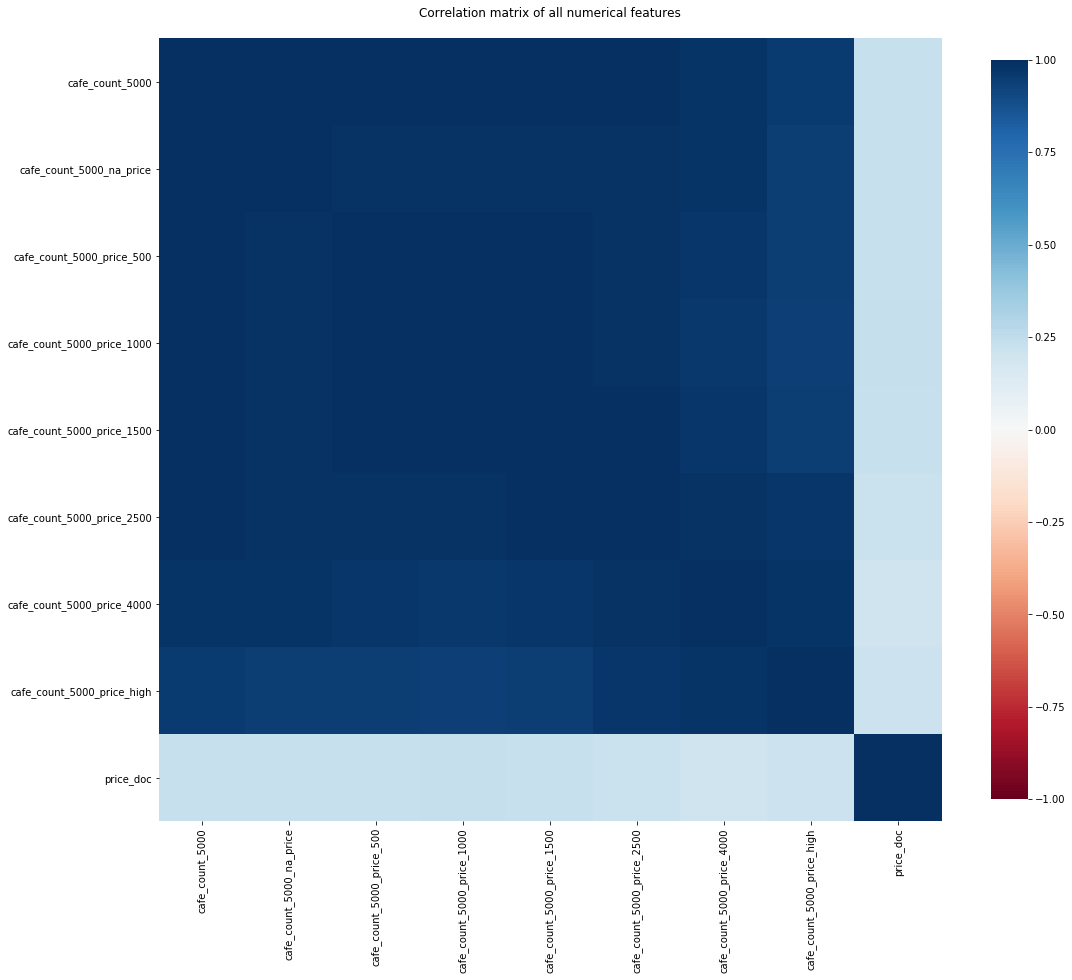

In [59]:
df_corr3 = df.filter([item for item in high_corr_list if 'cafe' in item]+['price_doc'], axis=1).select_dtypes(include=numerics)
df_corr3 = df_corr3.select_dtypes(include="number").corr()
# sort by SalePrice to make more sense in row order
plt.subplots(figsize=(16,16));
sns.heatmap(df_corr3, cmap="RdBu", vmin=-1, vmax=1, square=True, cbar_kws={"shrink": .7})
plt.title("Correlation matrix of all numerical features\n")
plt.tight_layout()
plt.show()

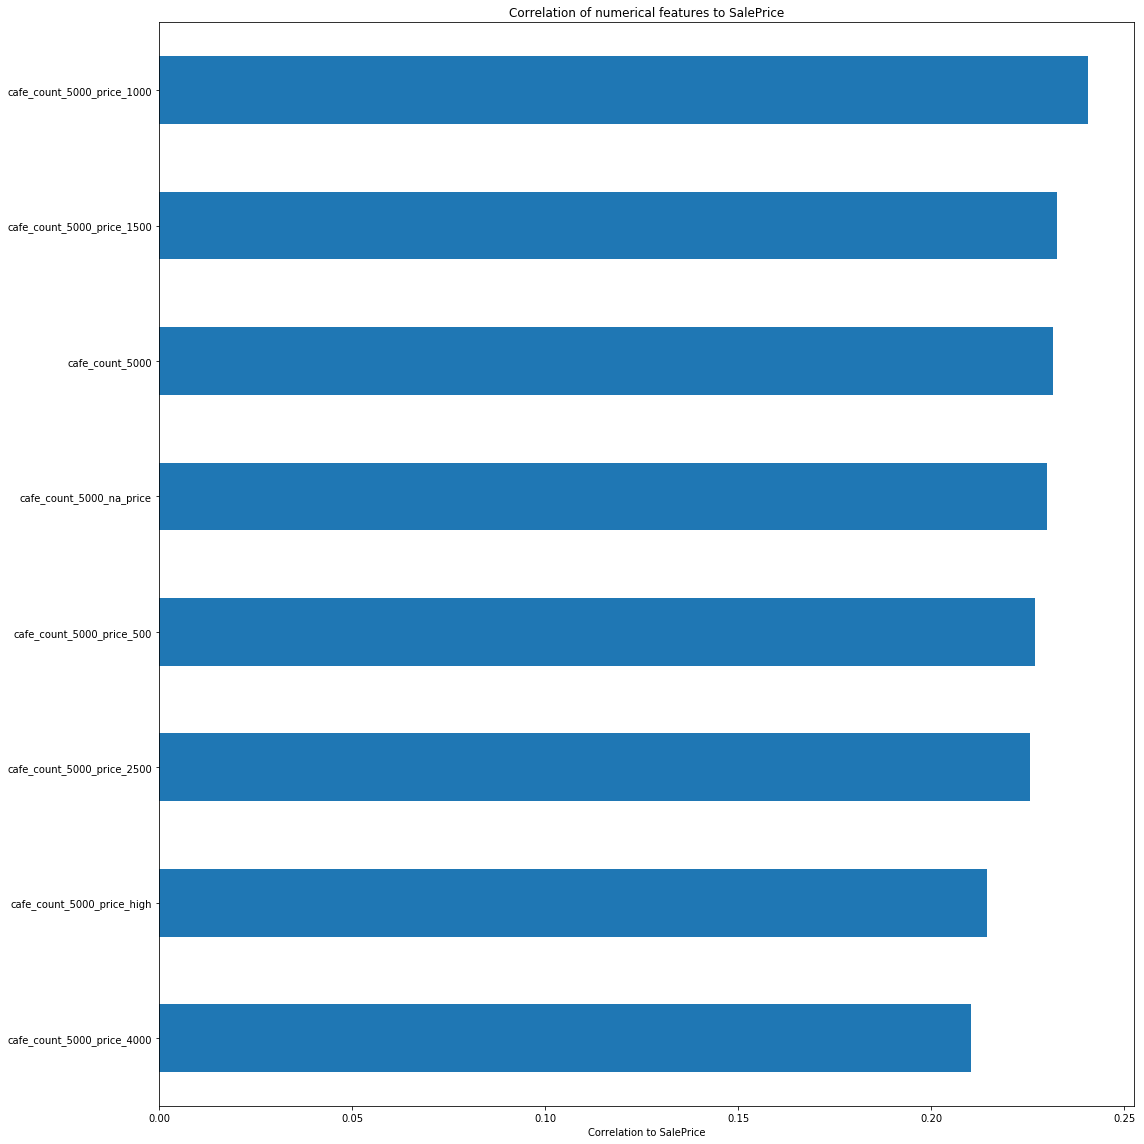

In [60]:
plt.figure(figsize=(16,16));
df_corr3["price_doc"].sort_values(ascending=True)[:-1].plot(kind="barh")
plt.title("Correlation of numerical features to SalePrice")
plt.xlabel("Correlation to SalePrice")
plt.tight_layout()
plt.show()

In [42]:
df_corr_sub = corr["price_doc"].reset_index()

In [61]:
high_corr_list = df_corr_sub[(df_corr_sub['price_doc']>0.2) | (df_corr_sub['price_doc'] < -0.2)]['index'].tolist()
high_corr_list = [item for item in high_corr_list if 'cafe' not in item]
high_corr_list += ['cafe_count_5000_price_1000']

In [62]:
df_corr2 = df.filter(high_corr_list, axis=1).select_dtypes(include=numerics)
df_corr2 = df_corr2.select_dtypes(include="number").corr()

In [63]:
df.filter(high_corr_list, axis=1).head()

,full_sq,sport_objects_raion,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,zd_vokzaly_avto_km,nuclear_reactor_km,thermal_power_plant_km,swim_pool_km,...,sport_count_3000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,church_count_5000,leisure_count_5000,sport_count_5000,price_doc,cafe_count_5000_price_1000
0,43,7,10.918587,13.100618,13.675657,15.156211,14.231961,5.718519,5.814135,3.065047,...,21,29,807385,52,4036616,22,0,52,5850000,48
1,34,6,3.103996,6.444333,8.132640,8.698054,9.242586,3.489954,3.419574,2.000154,...,19,66,2690465,40,2034942,29,10,66,6000000,65
2,43,5,2.927487,6.963403,8.054252,9.067885,9.540544,7.506612,3.682455,1.239304,...,20,43,1478160,35,1572990,27,4,67,5700000,45
3,89,17,14.606501,17.457198,18.309433,19.487005,17.478380,9.522538,11.178333,1.950317,...,18,8,244166,22,942180,4,0,26,13100000,21
4,77,25,1.721834,0.046810,0.787593,2.578671,1.595898,8.671016,4.587917,2.544696,...,77,689,8404624,114,3503058,236,91,195,16331452,578


In [67]:
cols_with_count = [item for item in high_corr_list if 'count' in item]
len(cols_with_count)
print(cols_with_count)

['sport_count_1500', 'sport_count_2000', 'trc_count_3000', 'sport_count_3000', 'office_count_5000', 'trc_count_5000', 'church_count_5000', 'leisure_count_5000', 'sport_count_5000', 'cafe_count_5000_price_1000']


In [73]:
sport_cols = [item for item in all_full_cols if ('sport' in item) & ('transport' not in item)]
trc_cols = [item for item in all_full_cols if 'trc' in item]

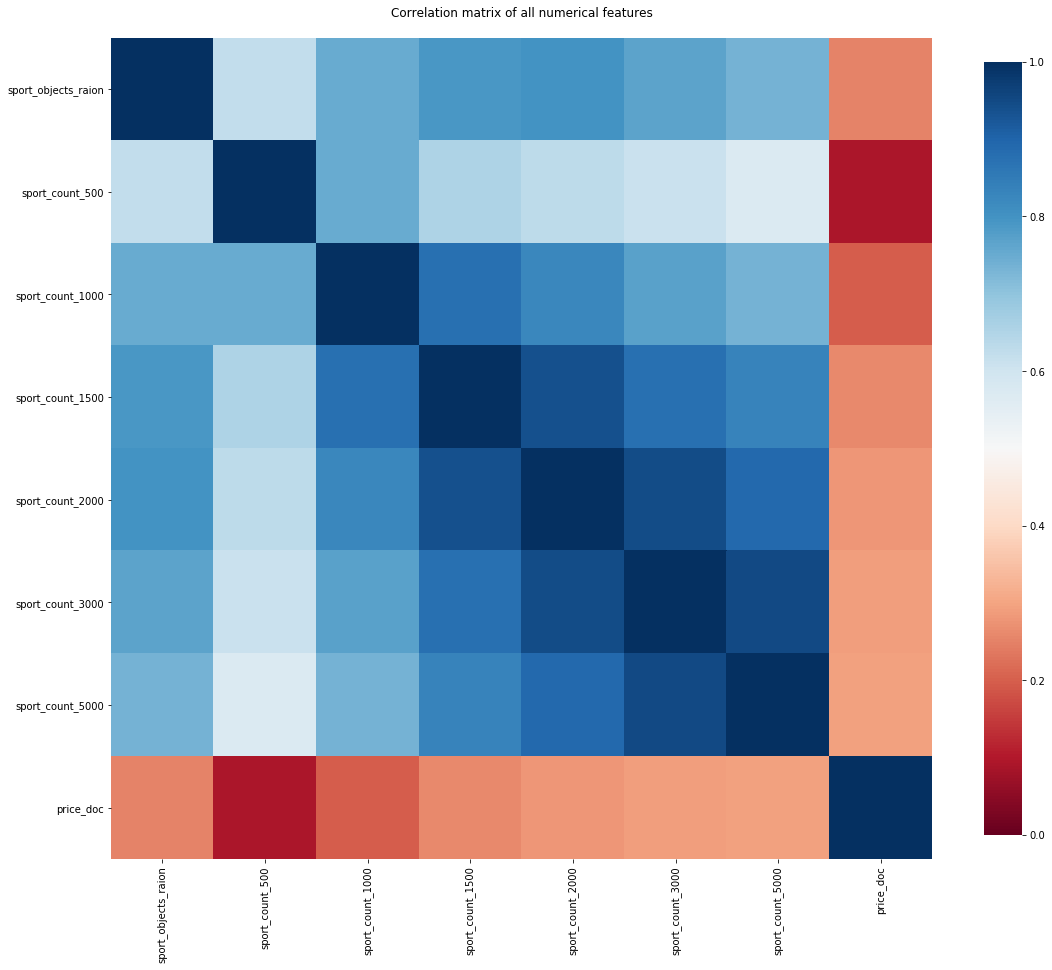

In [76]:
df_corr3 = df.filter(sport_cols+['price_doc'], axis=1).select_dtypes(include=numerics)
df_corr3 = df_corr3.select_dtypes(include="number").corr()
# sort by SalePrice to make more sense in row order
plt.subplots(figsize=(16,16));
sns.heatmap(df_corr3, cmap="RdBu", vmin=0, vmax=1, square=True, cbar_kws={"shrink": .7})
plt.title("Correlation matrix of all numerical features\n")
plt.tight_layout()
plt.show()

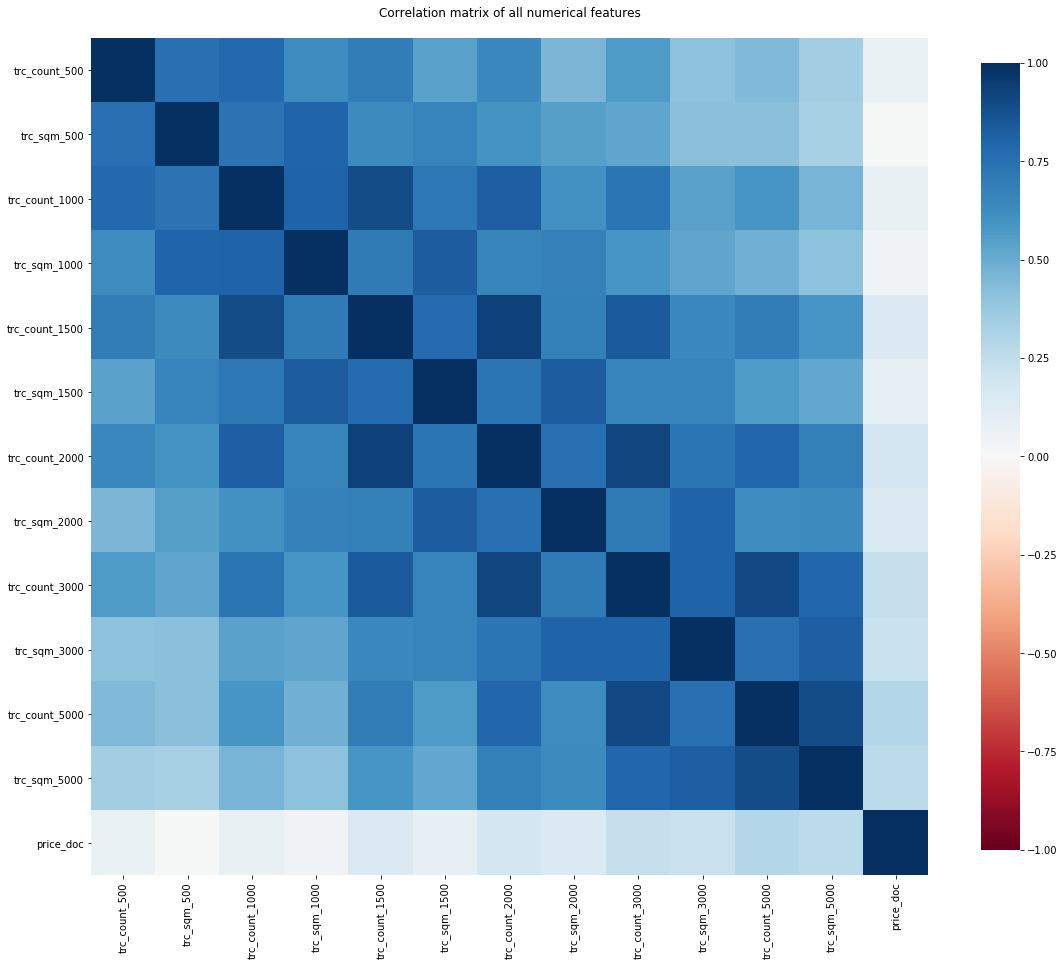

In [78]:
df_corr3 = df.filter(trc_cols+['price_doc'], axis=1).select_dtypes(include=numerics)
df_corr3 = df_corr3.select_dtypes(include="number").corr()
# sort by SalePrice to make more sense in row order
plt.subplots(figsize=(16,16));
sns.heatmap(df_corr3, cmap="RdBu", vmin=-1, vmax=1, square=True, cbar_kws={"shrink": .7})
plt.title("Correlation matrix of all numerical features\n")
plt.tight_layout()
plt.show()

In [ ]:
df_corr2 = df.filter(high_corr_list, axis=1).select_dtypes(include=numerics)
df_corr2 = df_corr2.select_dtypes(include="number").corr()

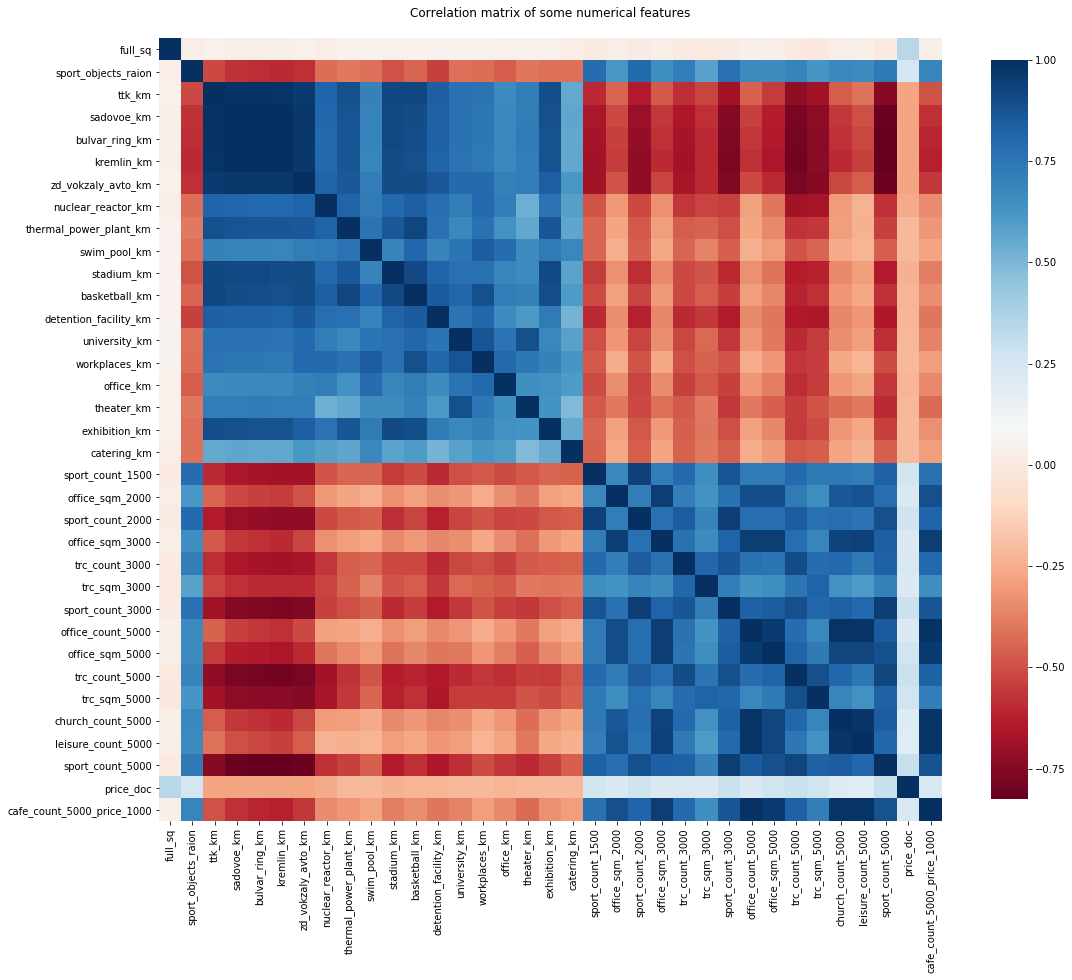

In [207]:
# sort by SalePrice to make more sense in row order
plt.subplots(figsize=(16,16));
sns.heatmap(df_corr2, cmap="RdBu", square=True, cbar_kws={"shrink": .7})
plt.title("Correlation matrix of some numerical features\n")
plt.tight_layout()
plt.show()

In [85]:
df_corr2_stack = df_corr2.stack().reset_index()
df_corr2_stack.columns = ['col1', 'col2', 'corr_coef']
df_corr2_stack = df_corr2_stack[df_corr2_stack['col1']!=df_corr2_stack['col2']].copy()

In [86]:
df_corr2_stack.head()

,col1,col2,corr_coef
1,full_sq,sport_objects_raion,0.028109
2,full_sq,ttk_km,0.040186
3,full_sq,sadovoe_km,0.034145
4,full_sq,bulvar_ring_km,0.033279
5,full_sq,kremlin_km,0.031128


In [102]:
#intern_high_corr_cols  = 
df_intercorr = df_corr2_stack[df_corr2_stack['corr_coef']>=0.9]\
    .sort_values('corr_coef',ascending=False)\
    .reset_index(drop=True) \
    .drop_duplicates(subset='corr_coef')
df_intercorr.head()

,col1,col2,corr_coef
0,bulvar_ring_km,kremlin_km,0.998804
2,sadovoe_km,bulvar_ring_km,0.998443
4,kremlin_km,sadovoe_km,0.997456
6,ttk_km,sadovoe_km,0.992477
8,cafe_count_5000_price_1000,office_count_5000,0.990976


In [104]:
from collections import Counter

In [106]:
col1_counted = Counter(df_intercorr.col1.tolist())
col2_counted = Counter(df_intercorr.col2.tolist())

In [133]:
pdf_col1_counted = pd.DataFrame.from_dict(col1_counted, orient='index')\
    .reset_index()\
    .rename(columns={'index':'col', 0:'count'})
pdf_col2_counted = pd.DataFrame.from_dict(col2_counted, orient='index')\
    .reset_index()\
    .rename(columns={'index':'col', 0:'count'})
pdf_col_counted = pdf_col1_counted\
    .merge(pdf_col2_counted, 
           on='col', how='outer', 
           suffixes=['_1','_2'])

In [138]:
pdf_col1_counted.head()

,col,count
0,bulvar_ring_km,1
1,sadovoe_km,2
2,kremlin_km,1
3,ttk_km,3
4,cafe_count_5000_price_1000,3


In [139]:
pdf_col2_counted.head()

,col,count
0,kremlin_km,4
1,bulvar_ring_km,4
2,sadovoe_km,4
3,office_count_5000,2
4,church_count_5000,3


In [134]:
pdf_col_counted

,col,count_1,count_2
0,bulvar_ring_km,1.0,4.0
1,sadovoe_km,2.0,4.0
2,kremlin_km,1.0,4.0
3,ttk_km,3.0,3.0
4,cafe_count_5000_price_1000,3.0,2.0
5,office_count_5000,3.0,2.0
6,leisure_count_5000,2.0,3.0
7,church_count_5000,2.0,3.0
8,zd_vokzaly_avto_km,4.0,2.0
9,office_sqm_5000,3.0,2.0


In [142]:
pdf_col_counted['max'] = pdf_col_counted\
    .fillna(0.0)\
    .apply(lambda x: max(x['count_1'],x['count_2']), axis=1)
pdf_col_counted['max_col'] = pdf_col_counted\
    .fillna(0.0)\
    .apply(lambda x: int(x['count_1']<=x['count_2'])+1, axis=1)
pdf_col_counted = pdf_col_counted\
    .sort_values('max', ascending=False)\
    .reset_index(drop=True)

In [143]:
pdf_col_counted

,col,count_1,count_2,max,max_col
0,stadium_km,6.0,1.0,6.0,1
1,kremlin_km,1.0,4.0,4.0,2
2,zd_vokzaly_avto_km,4.0,2.0,4.0,1
3,sadovoe_km,2.0,4.0,4.0,2
4,bulvar_ring_km,1.0,4.0,4.0,2
5,church_count_5000,2.0,3.0,3.0,2
6,basketball_km,3.0,2.0,3.0,1
7,office_sqm_5000,3.0,2.0,3.0,1
8,office_sqm_3000,3.0,3.0,3.0,2
9,leisure_count_5000,2.0,3.0,3.0,2


### Notes
Want to get those cols 
* which are highly correlated with each other
* get the one which has the most correlations with other columns
* save it
* and remove the other columns dependent upon it from the list

The result should be a thinned down column list.

In [202]:
col1_counted_keys = list(col1_counted.keys())
col2_counted_keys = list(col2_counted.keys())

cols_to_save = []

for n, row in pdf_col_counted.iterrows():
    
    key=row['col']
    
    print(key,col1_counted[key], len(col1_counted_keys), col2_counted[key], len(col2_counted_keys))
    
    if (key not in col1_counted_keys) | (key not in col2_counted_keys):
        print('\tskipping',key)
        continue

    cols_to_save.append(key)
    
    max_col = row['max_col']
    key_col=f'col{max_col}'
    target_col=f'col{(max_col%2)+1}'
    #print(max_col,key_col, target_col)
    
    rem_keys = df_intercorr[df_intercorr[key_col]==key][target_col].tolist()
    
    col1_counted_keys= [key_ for key_ in col1_counted_keys if key_ not in rem_keys]
    col2_counted_keys= [key_ for key_ in col2_counted_keys if key_ not in rem_keys]
        
    if (len(col1_counted_keys)==0) & (len(col2_counted_keys)==0):
        print('lists are empty!')
        break
print(len(cols_to_save),':',cols_to_save)   

cols_to_drop = [col for col in pdf_col_counted.col.tolist() if col not in cols_to_save]

stadium_km 6 18 1 19
kremlin_km 1 13 4 13
	skipping kremlin_km
zd_vokzaly_avto_km 4 13 2 13
	skipping zd_vokzaly_avto_km
sadovoe_km 2 13 4 13
	skipping sadovoe_km
bulvar_ring_km 1 13 4 13
	skipping bulvar_ring_km
church_count_5000 2 13 3 13
basketball_km 3 10 2 10
office_sqm_5000 3 9 2 9
office_sqm_3000 3 9 3 9
	skipping office_sqm_3000
leisure_count_5000 2 9 3 9
office_count_5000 3 8 2 8
	skipping office_count_5000
cafe_count_5000_price_1000 3 8 2 8
	skipping cafe_count_5000_price_1000
ttk_km 3 8 3 8
	skipping ttk_km
trc_count_5000 0 8 2 8
	skipping trc_count_5000
sport_count_5000 2 8 0 8
	skipping sport_count_5000
thermal_power_plant_km 1 8 0 8
	skipping thermal_power_plant_km
sport_count_2000 1 8 1 8
trc_count_3000 1 7 0 7
	skipping trc_count_3000
office_sqm_2000 0 7 1 7
	skipping office_sqm_2000
sport_count_1500 0 7 1 7
	skipping sport_count_1500
sport_count_3000 1 7 1 7
	skipping sport_count_3000
exhibition_km 0 7 1 7
	skipping exhibition_km
6 : ['stadium_km', 'church_count_5000',

In [203]:
cols_to_drop

['kremlin_km',
 'zd_vokzaly_avto_km',
 'sadovoe_km',
 'bulvar_ring_km',
 'office_sqm_3000',
 'office_count_5000',
 'cafe_count_5000_price_1000',
 'ttk_km',
 'trc_count_5000',
 'sport_count_5000',
 'thermal_power_plant_km',
 'trc_count_3000',
 'office_sqm_2000',
 'sport_count_1500',
 'sport_count_3000',
 'exhibition_km']

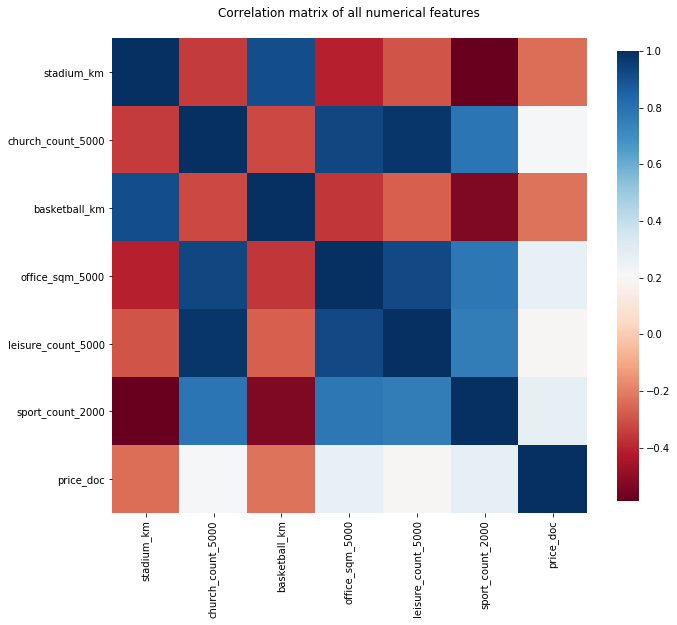

In [206]:
df_corr4 = df.filter(cols_to_save+['price_doc'], axis=1).select_dtypes(include=numerics)
df_corr4 = df_corr4.select_dtypes(include="number").corr()
# sort by SalePrice to make more sense in row order
plt.subplots(figsize=(10,10));
sns.heatmap(df_corr4, cmap="RdBu", square=True, cbar_kws={"shrink": .7})
plt.title("Correlation matrix of all numerical features\n")
plt.tight_layout()
plt.show()

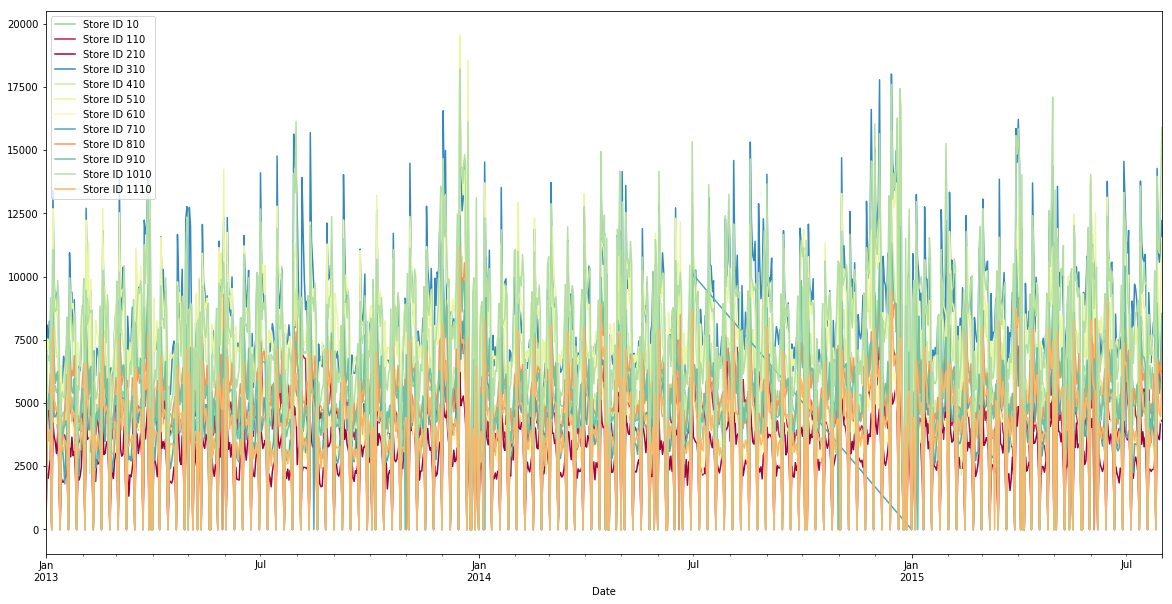

In [53]:
fig, ax = plt.subplots(1,1, figsize=[20,10])

m=0
for n, grp in df[df.Store.isin(list(range(10,1200,100)))].sort_values('Date').groupby('Store'):
    grp.plot(x='Date', y='Sales', color=colors[m], ax=ax, label=f'Store ID {n}')
    m += 1


(16071, 16435)

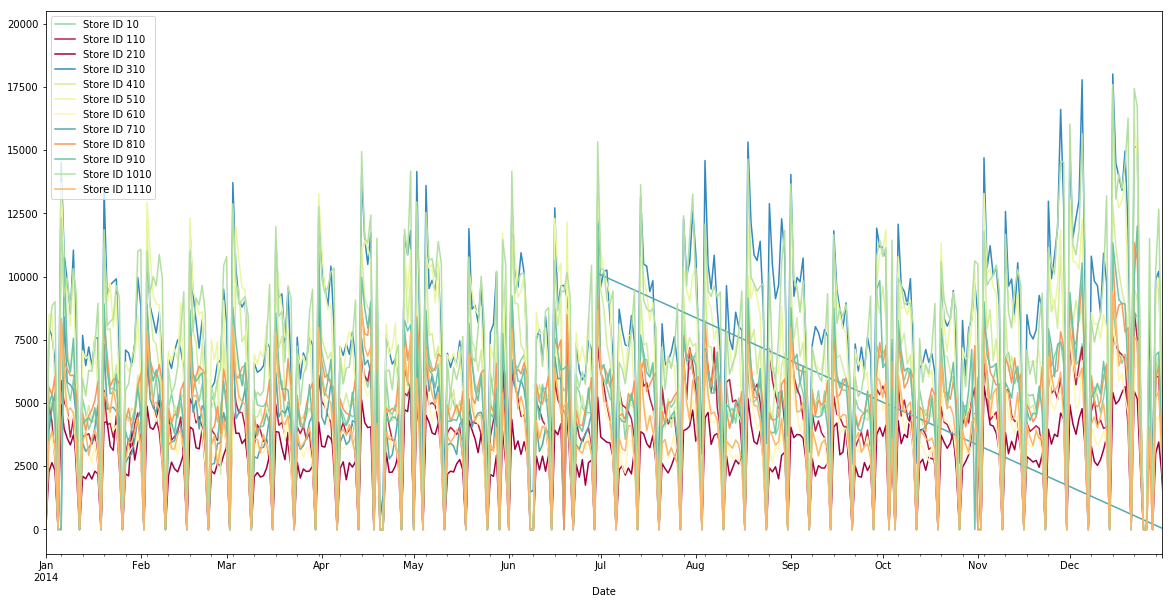

In [54]:
fig, ax = plt.subplots(1,1, figsize=[20,10])

m=0
for n, grp in df[df.Store.isin(list(range(10,1200,100)))].sort_values('Date').groupby('Store'):
    grp.plot(x='Date', y='Sales', color=colors[m], ax=ax, label=f'Store ID {n}')
    m += 1
ax.set_xlim('2014-01-01','2014-12-31')

(16071, 16251)

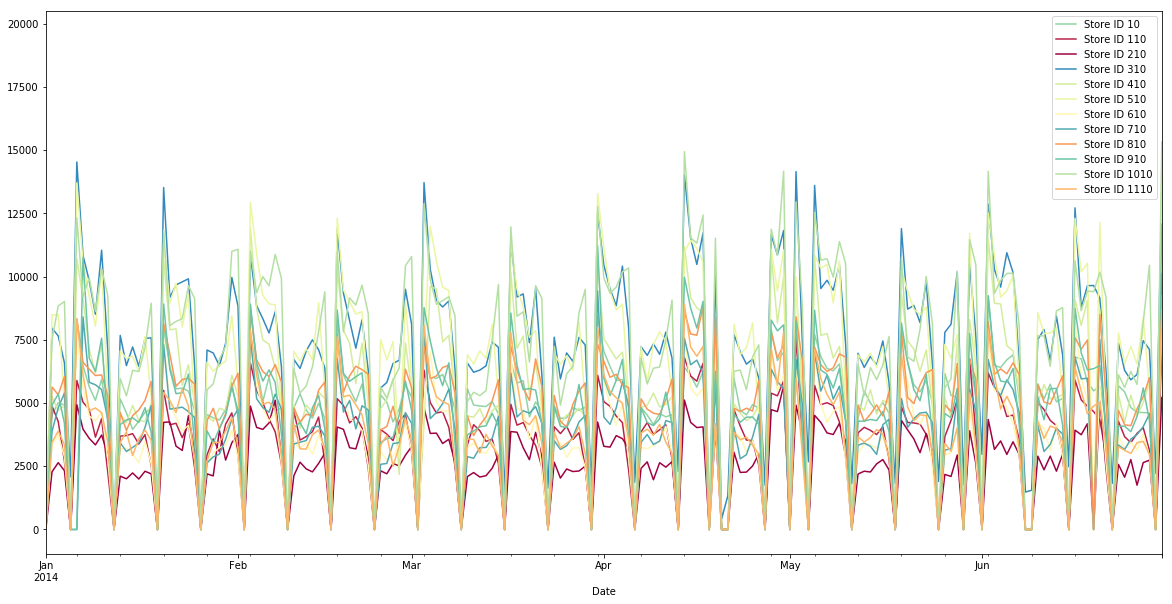

In [55]:
fig, ax = plt.subplots(1,1, figsize=[20,10])

m=0
for n, grp in df[df.Store.isin(list(range(10,1200,100)))].sort_values('Date').groupby('Store'):
    grp.plot(x='Date', y='Sales', color=colors[m], ax=ax, label=f'Store ID {n}')
    m += 1
ax.set_xlim('2014-01-01','2014-06-30')

(16222, 16251)

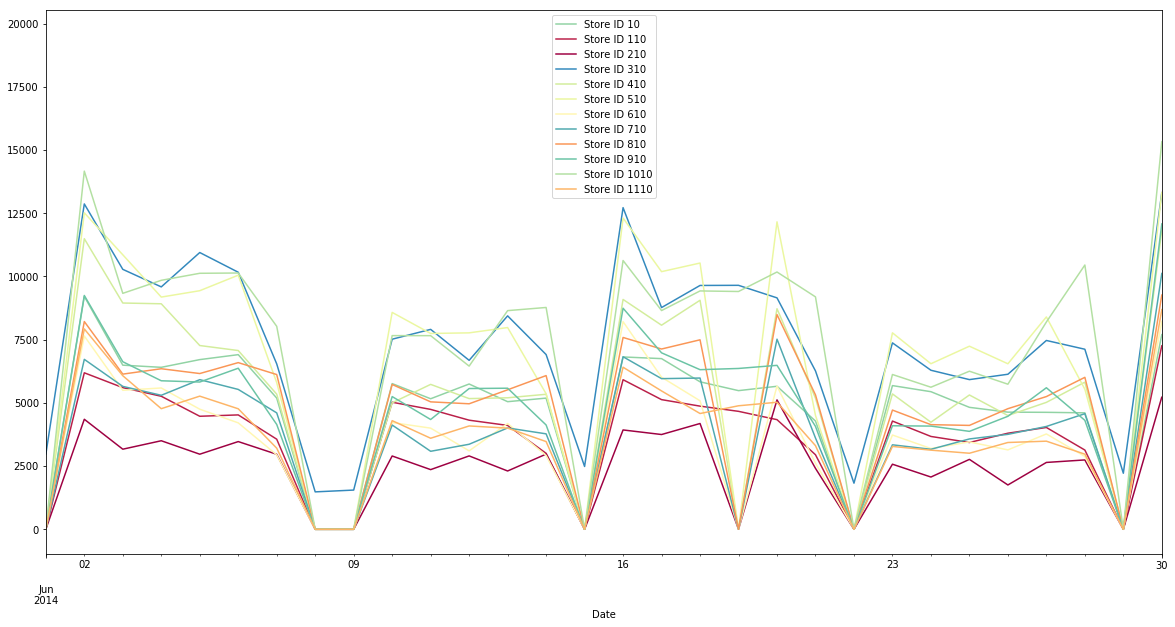

In [56]:
fig, ax = plt.subplots(1,1, figsize=[20,10])

m=0
for n, grp in df[df.Store.isin(list(range(10,1200,100)))].sort_values('Date').groupby('Store'):
    grp.plot(x='Date', y='Sales', color=colors[m], ax=ax, label=f'Store ID {n}')
    m += 1
ax.set_xlim('2014-06-01','2014-06-30')

### Test data

In [57]:
df_tst = pd.read_csv('../../datasets/rossmann-store-sales/test.csv', \
                 infer_datetime_format=True, parse_dates=['Date'], \
                 dtype={'StateHoliday':str})

In [59]:
df_tst.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [60]:
df_tst.describe()

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday
count,41088.000000,41088.000000,41088.000000,41077.000000,41088.000000,41088.000000
mean,20544.500000,555.899533,3.979167,0.854322,0.395833,0.443487
std,11861.228267,320.274496,2.015481,0.352787,0.489035,0.496802
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,10272.750000,279.750000,2.000000,1.000000,0.000000,0.000000
50%,20544.500000,553.500000,4.000000,1.000000,0.000000,0.000000
75%,30816.250000,832.250000,6.000000,1.000000,1.000000,1.000000
max,41088.000000,1115.000000,7.000000,1.000000,1.000000,1.000000


In [61]:
df_tst.Date.min(),df_tst.Date.max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))